In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from scipy.spatial.distance import euclidean as eu
import math
from scipy import signal

In [2]:
D_path = glob.glob('Data\Dyslexic' + "\*")
C_path = glob.glob('Data\Control' + "\*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)

D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)

In [3]:
C_new = []
for data in C_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    C_new.append(f)

In [4]:
D_new = []
for data in D_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    D_new.append(f)

In [5]:
trial = C_new[8]


In [6]:
C_cmx = []
for j in range(len(C_new)):
    dat = C_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
    
    C_cmx.append(z)

In [7]:
D_cmx = []
for j in range(len(D_new)):
    dat = D_new[j]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
        
    D_cmx.append(z)

In [10]:
data = C_cmx[5]
L= len(data)+1
#k = int((len(data) + 1)/250) # k varies from 4 to 8
N=20
B  = 100
E =0#round((N*B - L)/(N-1))
print(B)
print(E)
print(L)
max(np.abs(data))

100
0
1250


253.8728181753858

In [19]:
z

[0j,
 (4.999999994481499e-06-0.6553649999999951j),
 (-0.3276850000000016-0.6553800000000001j),
 (11.79662-3.27691j),
 (22.282575-3.604635j),
 (21.954905-1.9662099999999998j),
 (22.28258-1.63854j),
 (22.61024-1.63854j),
 (22.93793-1.310855j),
 (22.937925-0.98318j),
 (22.937914999999997-0.983185j),
 (22.937905-0.6554949999999999j),
 (22.9379-0.00014500000000000624j),
 (22.937914999999997+0.3275449999999991j),
 (22.937894999999997+0.982915j),
 (22.937894999999997+1.96596j),
 (22.282535+2.293655j),
 (22.282555000000002+3.2767049999999998j),
 (21.954855+3.932075j),
 (21.299495+4.587434999999999j),
 (21.627195+4.9151299999999996j),
 (21.62718+4.915134999999999j),
 (21.62717+5.242825j),
 (21.62716+5.570515j),
 (21.299464999999998+5.57053j),
 (20.9718+5.57053j),
 (20.316409999999998+5.242865j),
 (1.6384599999999998+5.24299j),
 (-5.5705849999999995+8.19221j),
 (-5.2428799999999995+9.502955j),
 (-5.242884999999999+10.15832j),
 (-5.242905+10.813685j),
 (-5.242905+10.813695j),
 (-5.242905+10.81369

C:\Python\Python37\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


14
1249


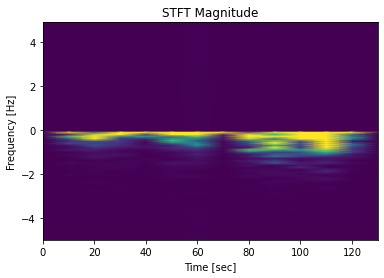

In [11]:
f, t, Zxx = signal.stft(data, fs=10,nperseg=B,noverlap= E)
print(len(t))
print(len(data))
X =plt.pcolormesh(t, f, np.abs(Zxx)**2 ,vmax=max(np.abs(data)),shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

21
1249


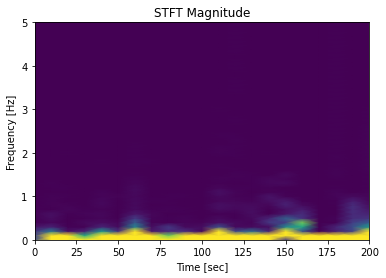

In [12]:
f, t, Zxx = signal.stft(x, fs=10,nperseg=B,noverlap= E)
print(len(t))
print(len(data))
X =plt.pcolormesh(t, f, np.abs(Zxx)**2 ,vmax=max(np.abs(data)),shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

21
1249


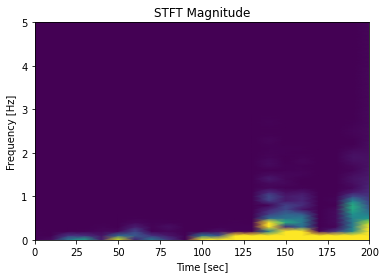

In [14]:
f, t, Zxx = signal.stft(y, fs=10,nperseg=B,noverlap= E)
print(len(t))
print(len(data))
X =plt.pcolormesh(t, f, np.abs(Zxx)**2 ,vmax=max(np.abs(data)),shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [82]:
tmat =[]
tmat.append(C_cmx[6])
tmat.append(C_cmx[7])
tmat.append(C_cmx[9])
tmat.append(C_cmx[10])
tmat.append(C_cmx[11])


In [60]:
len(tmat)

5

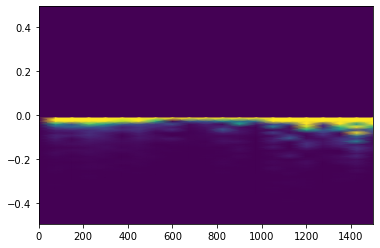

In [85]:


C_spec = []
for j in range(len(tmat)):
    data = tmat[j]
    L= len(data)+1
    k = int((len(data) + 1)/250) # k varies from 4 to 8
    N=20
    B  = 75
    E =0#round((N*B - L)/(N-1))
    f, t, Zxx = signal.stft(tmat[j], nperseg=B,noverlap= E)
    P = plt.pcolormesh(t, f, np.abs(Zxx)**2 ,vmax=max(np.abs(data)),shading='gouraud')
    C_spec.append([f,t,np.abs(Zxx)**2])

In [39]:
vec = []
for i in range(5):
    vec.append(C_spec[i][2])
    
for i in range(5):
    vec[i]=vec[i].flatten()

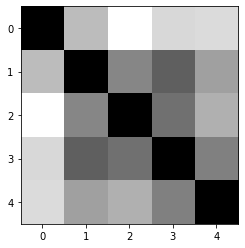

In [58]:
mat = return_sq_im(vec)
mx =mat /np.amax(mat)
im =mx*256
plt.imshow(im, cmap='gray', vmin=0, vmax=256)
plt.show()

In [79]:
def return_sq_im(buckets):    
    matrix = np.empty([10,10])    
    for a in range(10):
        for b in range(10):
            m = buckets[a]
            n = buckets[b]

            dis = eu([m], [n])
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    return matrix

In [76]:
tmat =[]
tmat.append(C_cmx[1])
tmat.append(C_cmx[3])
tmat.append(C_cmx[16])
tmat.append(C_cmx[34])
tmat.append(C_cmx[38])
tmat.append(D_cmx[0])
tmat.append(D_cmx[1])
tmat.append(D_cmx[2])
tmat.append(D_cmx[3])
tmat.append(D_cmx[4])

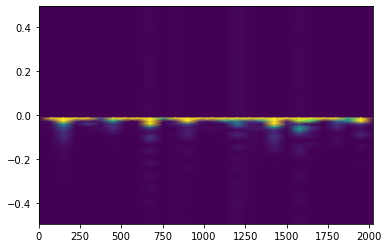

In [77]:
Mix_spec = []
for j in range(len(tmat)):
    data = tmat[j]
    L= len(data)+1
    k = int((len(data) + 1)/250) # k varies from 4 to 8
    N=20
    B  = 75
    E =0#round((N*B - L)/(N-1))
    f, t, Zxx = signal.stft(tmat[j], nperseg=B,noverlap= E)
    P = plt.pcolormesh(t, f, np.abs(Zxx)**2 ,vmax=max(np.abs(data)),shading='gouraud')
    Mix_spec.append([f,t,np.abs(Zxx)**2])

In [78]:
mvec = []
for i in range(10):
    mvec.append(Mix_spec[i][2])
    
for i in range(10):
    mvec[i]=mvec[i].flatten()

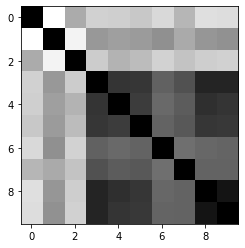

In [81]:
mat = return_sq_im(mvec)
mx =mat /np.amax(mat)
im =mx*256
plt.imshow(im, cmap='gray', vmin=0, vmax=256)
plt.show()